<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic15/PyTorch_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

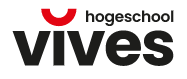<br>


**DEEP LEARNING**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **PyTorch Challenge**

## Introduction

An aquifer is an underground layer of water-bearing material, consisting of permeable or fractured rock, or of unconsolidated materials, such as gravel, sand, or silt. In hydrogeology, an [aquifer test](https://en.wikipedia.org/wiki/Aquifer_test) (or a pumping test) is conducted to evaluate an aquifer by "stimulating" the aquifer through constant pumping, and observing the aquifer's "response" (drawdown) in observation wells. Aquifer testing is a common tool that hydrogeologists use to characterize a system of aquifers, aquitards and flow system boundaries.

The [Thiem formula](https://en.wikipedia.org/wiki/Aquifer_test#Steady-state_Thiem_solution) is a well-know solution that describes steady-state radial flow to a pumping well in a confined aquifer:

> $s = \dfrac{Q}{2 \pi T}\ln{\dfrac{R}{r}}$

with:

- $s$ the drawdown [L], which is the difference between the water level in the aquifer before and during pumping;
- $Q$ the constant pumping rate [L³/T] of the pumping well;
- $T$ the aquifer transmissivity [L²/T], which is a measure of how much water can be transmitted horizontally through the aquifer;
- $r$ is the radial distance [L] from the pumping well.
- $R$ is the radius [L] of influence, which is the radial distance from the well at which drawdown $s$ is zero.

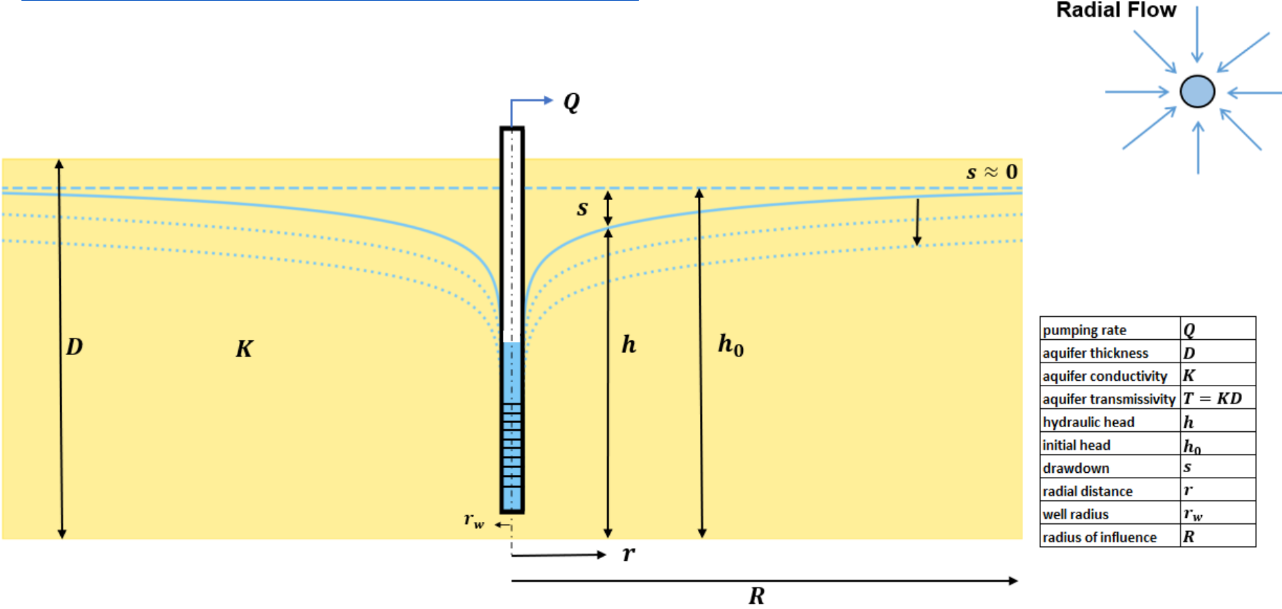

Using NumPy, it's very straightforward to implement the Thiem formula:

In [ ]:
import numpy as np

def thiem(Q, T, R, r):
    return Q / 2 / np.pi / T * np.log(R / r)

Here is an example of how the drawdown $s$ of the water level due to pumping is calculated at different distances $r$:

In [ ]:
Q  = 1000  # pumping rate (m³/d)
T  = 200   # transmissivity (m²/d)
R  = 500   # radius of influence (m)

r = np.logspace(-2, np.log10(R), 100)        # radial distances (m)
s = thiem(Q=Q, T=T, R=R, r=r)  # drawdown s (m) according to the Thiem formula

And here is the corresponding plot of the so called *cone of depression* around the pumping well that extracts groundwater from the aquifer:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2));
plt.plot(-r, -s, 'b-');
plt.plot(r, -s, 'b-');
plt.grid();

When analyzing pumping tests, it's more convenient, however, to create a plot of $s$ as a function of the logarithm of $r$:

In [ ]:
plt.semilogx(r, s);
plt.grid();
plt.xlabel('$r$ (m)');
plt.ylabel('$s$ (m)');

**In this challenge you have to answer the question whether it is possible to develop an artificial neural network that is able to learn the Thiem formula!**

## The Dataset

Let's generate a dataset for supervised learning using the Thiem formula. The dataset has the following features: $Q$, $T$, $R$, $r$, and $s$, where the latter is the target.

In [ ]:
import pandas as pd

np.random.seed(2024)

n = 1000  # number of samples
Q = 10 + np.random.rand(n) * 90
T = 1 + np.random.rand(n) * 999
R = 100 + np.random.rand(n) * 900
r = R * 0.1 * np.random.rand(n)

df = pd.DataFrame(dict(Q=Q, T=T, R=R, r=r,
                       s=np.array([thiem(Q, T, R, r) for Q, T, R, r in zip(Q, T, R, r)])))

Let's create scatterplots to get an idea of the relationship between features and target:

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(10, 10));
for ax, feature in zip(ax.flatten(), df.columns):
    df.plot.scatter(x=feature, y='s', ax=ax);
    ax.grid();

## Training a Neural Net

Now develop an artificial neural network **using PyTorch** that will learn the Thiem formula from the generated dataset.

Print the loss function during training!

**Some obligations and restrictions** regarding the dataset and the neural net:
- do not split the dataset into training-, validation- and test set, and use all samples in the dataset to train the model;
- use all features in the dataset;
- only use fully connected layers (`torch.nn.Linear`) and ReLU (`torch.nn.ReLU`) as activation function;
- use one hidden layer only (input and output layer not included);
- the maximum number of nodes allowed for the hidden layer is 4;
- don't train longer than 5000 epochs.

## Evaluating the Neural Net

Use the trained model to predict drawdown $s$. Make a scatterplot of predicted drawdown (y-axis) versus actual drawdown (x-axis) and calculate the coefficient of determination R². Don't forget to invert the target variable back if it was transformed during training!

Display the coefficient of determination R² in the title of the plot with a precision of 4 digits after the decimal separator. The winner is the one who obtains the highest value for R²!

---

**When determining the winner, the notebook will NOT be re-executed. Therefore, ensure that the output of all cells is visible when the notebook is opened in Google Colab. Avoid error messages. Follow the instructions correctly!**

**May the best one win!**

---